In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow import keras
import os

In [2]:
data_dir="/Users/madhurabhagat/Downloads/Data/CT/CT_img/Kindy_Stone/Original"

In [3]:
print("Length of Data:",len(data_dir))

Length of Data: 66


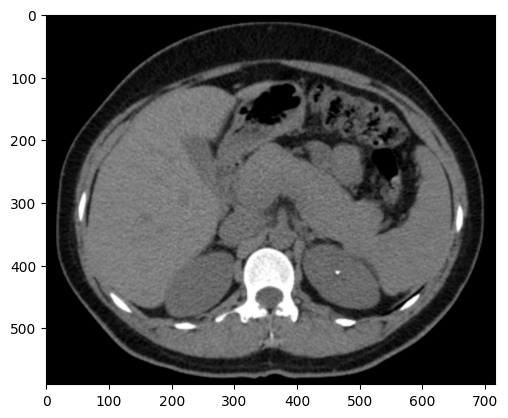

In [4]:
img=mpimg.imread("/Users/madhurabhagat/Downloads/Data/CT/CT_img/Kindy_Stone/Original/Stone/0.jpg")
imgplot=plt.imshow(img)
plt.show()

In [5]:
type(img)

numpy.ndarray

In [6]:
img_size=128
batch_size=32

In [7]:
datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

In [8]:
train_data=datagen.flow_from_directory(
    data_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

Found 2693 images belonging to 2 classes.


In [9]:
val_data=datagen.flow_from_directory(
    data_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

Found 672 images belonging to 2 classes.


In [10]:
base_model=VGG16(include_top=False,weights="imagenet",input_shape=(128,128,3))

In [11]:
x=Flatten()(base_model.output)
x=Dense(256,activation="relu")(x)
x=Dropout(0.5)(x)
x=Dense(train_data.num_classes,activation="softmax")(x)

In [12]:
model=Model(inputs=base_model.input,outputs=x)

In [13]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
base_model.trainable = False

In [15]:
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.5864 - loss: 1.1009 - val_accuracy: 0.3467 - val_loss: 0.9954
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.7412 - loss: 0.5298 - val_accuracy: 0.4226 - val_loss: 1.0883
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 712s 8s/step - accuracy: 0.7799 - loss: 0.4657 - val_accuracy: 0.4271 - val_loss: 1.4496
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.8142 - loss: 0.4115 - val_accuracy: 0.4286 - val_loss: 1.3400
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.8175 - loss: 0.3963 - val_accuracy: 0.4673 - val_loss: 1.1222


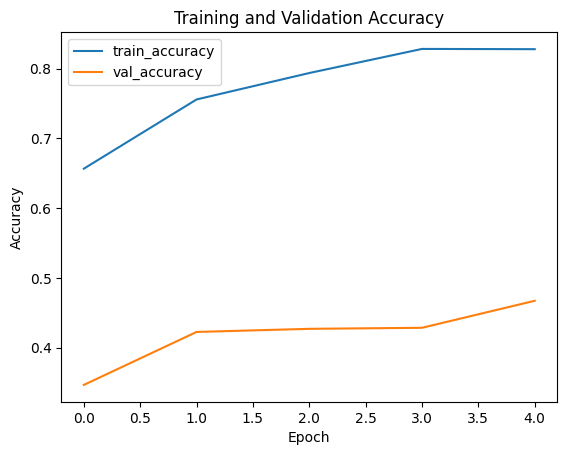

In [16]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()